# F1 Race Dataset Project




---

## Ethan Gomes

In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import ExponentialSmoothing

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Load the Datasets given

In [494]:
# Load all datasets
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
pit_stops = pd.read_csv('pit_stops.csv')



## Get Shape of the Datasets

In [495]:
print("Dataset Shapes:")
print(f"Drivers: {drivers.shape}")
print(f"Constructors: {constructors.shape}")
print(f"Races: {races.shape}")
print(f"Results: {results.shape}")
print(f"Pit Stops: {pit_stops.shape}")

Dataset Shapes:
Drivers: (864, 9)
Constructors: (212, 5)
Races: (1149, 18)
Results: (27178, 18)
Pit Stops: (12101, 7)


## Check the datasets

In [496]:
# Display first few rows of each dataset
print("\nDrivers Dataset:")
display(drivers.head())

print("\nConstructors Dataset:")
display(constructors.head())

print("\nRaces Dataset:")
display(races.head())

print("\nResults Dataset:")
display(results.head())

print("\nPit Stops Dataset:")
display(pit_stops.head())


Drivers Dataset:


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen



Constructors Dataset:


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso



Races Dataset:


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N



Results Dataset:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1



Pit Stops Dataset:


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


## Check for Missing Values

In [497]:

print("Missing Values in Each Dataset:\n")

print("Drivers:")
print(drivers.isnull().sum())

print("Constructors:")
print(constructors.isnull().sum())

print("Races:")
print(races.isnull().sum())

print("Results:")
print(results.isnull().sum())

print("Pit Stops:")
print(pit_stops.isnull().sum())

Missing Values in Each Dataset:

Drivers:
driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64
Constructors:
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64
Races:
raceId          0
year            0
round           0
circuitId       0
name            0
date            0
time            0
url             0
fp1_date       24
fp1_time       24
fp2_date       24
fp2_time       24
fp3_date       24
fp3_time       24
quali_date     24
quali_time     24
sprint_date    24
sprint_time    24
dtype: int64
Results:
resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank              

## Clean the Dataset and Remove Missing Values

In [498]:

# Handle null values represented as '\N'
results['position'] = results['position'].replace('\\N', None)
pit_stops['milliseconds'] = pit_stops['milliseconds'].replace('\\N', None)


races['date'] = pd.to_datetime(races['date'], errors='coerce')
races['year'] = races['date'].dt.year

results['points'] = pd.to_numeric(results['points'], errors='coerce')
results['laps'] = pd.to_numeric(results['laps'], errors='coerce')
results['grid'] = pd.to_numeric(results['grid'], errors='coerce')
results['position'] = pd.to_numeric(results['position'], errors='coerce')
results['milliseconds'] = pd.to_numeric(results['milliseconds'], errors='coerce')
results['rank'] = pd.to_numeric(results['rank'], errors='coerce')
results['fastestLap'] = pd.to_numeric(results['fastestLap'], errors='coerce')
results['fastestLapSpeed'] = pd.to_numeric(results['fastestLapSpeed'], errors='coerce')

drivers['dob'] = pd.to_datetime(drivers['dob'], errors='coerce')

pit_stops['stop'] = pd.to_numeric(pit_stops['stop'], errors='coerce')
pit_stops['lap'] = pd.to_numeric(pit_stops['lap'], errors='coerce')
pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
pit_stops['milliseconds'] = pd.to_numeric(pit_stops['milliseconds'], errors='coerce')

##  Filter for Target Teams

In [499]:
# Define target teams
target_teams = ['Mercedes', 'Ferrari', 'Red Bull', 'McLaren', 'Alpine F1 Team']
print(f"Filtering for teams: {target_teams}\n")

# Filter constructors for target teams
constructors_filtered = constructors[constructors['name'].isin(target_teams)].copy()

print(f"Filtered constructors shape: {constructors_filtered.shape}")

display(constructors_filtered[['constructorId', 'name', 'nationality']])

Filtering for teams: ['Mercedes', 'Ferrari', 'Red Bull', 'McLaren', 'Alpine F1 Team']

Filtered constructors shape: (5, 5)


,constructorId,name,nationality
0,1,McLaren,British
5,6,Ferrari,Italian
8,9,Red Bull,Austrian
129,131,Mercedes,German
210,214,Alpine F1 Team,French


##  Merge Datasets - Create Master Dataframe

In [500]:

master_df = results.merge(races[['raceId', 'year', 'round', 'name', 'date']], 
                          on='raceId', how='left')


master_df = master_df.merge(drivers[['driverId', 'forename', 'surname', 'nationality', 'dob']], 
                            on='driverId', how='left')


master_df = master_df.rename(columns={'name': 'race_name'})

master_df = master_df.merge(constructors[['constructorId', 'name']], 
                            on='constructorId', how='left')

master_df = master_df.rename(columns={'name': 'team_name'})


master_df = master_df[master_df['team_name'].isin(target_teams)].copy()

print(f"Master dataframe shape: {master_df.shape}")
print(f"\nColumns: {list(master_df.columns)}")
print("\nFirst few rows of master dataframe:")
display(master_df.head())

Master dataframe shape: (6192, 27)

Columns: ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year', 'round', 'race_name', 'date', 'forename', 'surname', 'nationality', 'dob', 'team_name']

First few rows of master dataframe:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,year,round,race_name,date,forename,surname,nationality,dob,team_name
0,1,18,1,1,22,1,1.0,1,1,10.0,...,1,2008,1,Australian Grand Prix,2008-03-16,Lewis,Hamilton,British,1985-01-07,McLaren
4,5,18,5,1,23,3,5.0,5,5,4.0,...,1,2008,1,Australian Grand Prix,2008-03-16,Heikki,Kovalainen,Finnish,1981-10-19,McLaren
7,8,18,8,6,1,15,8.0,8,8,1.0,...,5,2008,1,Australian Grand Prix,2008-03-16,Kimi,Räikkönen,Finnish,1979-10-17,Ferrari
12,13,18,13,6,2,4,NaN,R,13,0.0,...,5,2008,1,Australian Grand Prix,2008-03-16,Felipe,Massa,Brazilian,1981-04-25,Ferrari
13,14,18,14,9,9,8,NaN,R,14,0.0,...,4,2008,1,Australian Grand Prix,2008-03-16,David,Coulthard,British,1971-03-27,Red Bull


## Create New Columns Mentioned

In [501]:

master_df['driver_full_name'] = master_df['forename'] + ' ' + master_df['surname']
master_df['race_year'] = master_df['year'].astype(int)

master_df['position_improvement'] = master_df['grid'] - master_df['position']
master_df['position_improvement'].fillna(0, inplace=True)

master_df['points_per_race'] = master_df['points']


print("\nSample of new columns:")
display(master_df[['driver_full_name', 'race_year', 'position_improvement', 'points_per_race']].head(10))


Sample of new columns:


,driver_full_name,race_year,position_improvement,points_per_race
0,Lewis Hamilton,2008,0.0,10.0
4,Heikki Kovalainen,2008,-2.0,4.0
7,Kimi Räikkönen,2008,7.0,1.0
12,Felipe Massa,2008,0.0,0.0
13,David Coulthard,2008,0.0,0.0
16,Mark Webber,2008,0.0,0.0
22,Kimi Räikkönen,2008,1.0,10.0
24,Heikki Kovalainen,2008,5.0,6.0
26,Lewis Hamilton,2008,4.0,4.0
28,Mark Webber,2008,-1.0,2.0


## Add Pit Stop Statistics

In [502]:

pit_stop_stats = pit_stops.groupby(['raceId', 'driverId']).agg(
    total_pit_stop_time=('milliseconds', 'sum'),
    number_of_pit_stops=('stop', 'count')
).reset_index()


pit_stop_stats['total_pit_stop_time_sec'] = pit_stop_stats['total_pit_stop_time'] / 1000


master_df = master_df.merge(
    pit_stop_stats[['raceId', 'driverId', 'total_pit_stop_time_sec', 'number_of_pit_stops']], 
    on=['raceId', 'driverId'], 
    how='left'
)


master_df['number_of_pit_stops'].fillna(0, inplace=True)
master_df['total_pit_stop_time_sec'].fillna(0, inplace=True)

display(master_df[['driver_full_name', 'race_year', 'number_of_pit_stops', 'total_pit_stop_time_sec']].head(10))

print(f"\nFinal master dataframe shape: {master_df.shape}")
print(f"Date range: {master_df['race_year'].min()} - {master_df['race_year'].max()}")

,driver_full_name,race_year,number_of_pit_stops,total_pit_stop_time_sec
0,Lewis Hamilton,2008,0.0,0.0
1,Heikki Kovalainen,2008,0.0,0.0
2,Kimi Räikkönen,2008,0.0,0.0
3,Felipe Massa,2008,0.0,0.0
4,David Coulthard,2008,0.0,0.0
5,Mark Webber,2008,0.0,0.0
6,Kimi Räikkönen,2008,0.0,0.0
7,Heikki Kovalainen,2008,0.0,0.0
8,Lewis Hamilton,2008,0.0,0.0
9,Mark Webber,2008,0.0,0.0



Final master dataframe shape: (6192, 33)
Date range: 1950 - 2025


## PIT STOPS vs Performance

In [503]:



pit_data = master_df[master_df['number_of_pit_stops'] > 0].copy()



avg_pitstops = pit_data.groupby('team_name')['number_of_pit_stops'].mean().reset_index()
avg_pitstops = avg_pitstops.sort_values('number_of_pit_stops', ascending=False)

fig1 = px.bar(avg_pitstops, 
              x='team_name', 
              y='number_of_pit_stops',
              color='team_name',
              title='Average Number of Pit Stops by Team',
              labels={'team_name': 'Team', 
                     'number_of_pit_stops': 'Average Pit Stops'},
              text='number_of_pit_stops')

fig1.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig1.update_layout(showlegend=False, height=500)
fig1.show()




fig2 = px.scatter(pit_data, 
                  x='number_of_pit_stops', 
                  y='points',
                  color='team_name',
                  hover_data=['driver_full_name', 'race_year', 'position'],
                  title='Number of Pit Stops vs Points Scored',
                  labels={'number_of_pit_stops': 'Number of Pit Stops',
                         'points': 'Points Scored',
                         'team_name': 'Team'},
                  opacity=0.6)

fig2.update_layout(height=500)
fig2.show()





##  Basic Statistics Summary

In [504]:
# Display basic statistics
display(master_df.describe())


,resultId,raceId,driverId,constructorId,grid,position,positionOrder,points,laps,milliseconds,...,statusId,year,round,date,dob,race_year,position_improvement,points_per_race,total_pit_stop_time_sec,number_of_pit_stops
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,4754.000000,6192.000000,6192.000000,6192.000000,3.679000e+03,...,6192.000000,6192.000000,6192.000000,6192,6192,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,16116.624031,660.871447,299.672481,26.282784,6.849483,5.404291,8.384367,5.776552,52.354651,5.985425e+06,...,8.765504,2000.264696,9.273579,2000-10-19 09:42:33.488372224,1970-07-13 19:36:58.604651174,2000.264696,0.934755,5.776552,72.929822,0.822997
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.070710e+05,...,1.000000,1950.000000,1.000000,1950-05-21 00:00:00,1898-08-18 00:00:00,1950.000000,-19.000000,0.000000,0.000000,0.000000
25%,8184.750000,340.000000,18.000000,1.000000,3.000000,2.000000,3.000000,0.000000,44.000000,5.341840e+06,...,1.000000,1985.000000,5.000000,1985-07-07 00:00:00,1955-02-24 00:00:00,1985.000000,0.000000,0.000000,0.000000,0.000000
50%,19093.000000,749.000000,117.000000,6.000000,5.000000,4.000000,6.000000,3.000000,56.000000,5.692887e+06,...,1.000000,2007.000000,9.000000,2007-07-01 00:00:00,1976-08-27 00:00:00,2007.000000,0.000000,3.000000,0.000000,0.000000
75%,23863.250000,993.000000,647.000000,9.000000,10.000000,8.000000,13.000000,10.000000,69.000000,6.176596e+06,...,10.000000,2018.000000,14.000000,2018-05-13 00:00:00,1987-07-03 00:00:00,2018.000000,2.000000,10.000000,42.289000,2.000000
max,27182.000000,1165.000000,863.000000,214.000000,31.000000,22.000000,33.000000,50.000000,110.000000,1.472999e+07,...,140.000000,2025.000000,24.000000,2025-11-09 00:00:00,2006-08-25 00:00:00,2025.000000,21.000000,50.000000,3703.013000,7.000000
std,8708.521932,364.869947,337.052672,53.857224,5.262235,4.133501,6.812950,7.020300,22.119421,1.299252e+06,...,19.774277,20.845546,5.500922,NaN,NaN,20.845546,3.927045,7.020300,338.494543,1.181208


In [505]:
print(master_df['position'].describe())

count    4754.000000
mean        5.404291
std         4.133501
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        22.000000
Name: position, dtype: float64


In [506]:
print(master_df['points'].describe())

count    6192.000000
mean        5.776552
std         7.020300
min         0.000000
25%         0.000000
50%         3.000000
75%        10.000000
max        50.000000
Name: points, dtype: float64


In [507]:
print(master_df['number_of_pit_stops'].describe())

count    6192.000000
mean        0.822997
std         1.181208
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         7.000000
Name: number_of_pit_stops, dtype: float64


## Average Pit Stop Time vs Average Points by Team

In [508]:
pit_team_avg = pit_data.groupby('team_name').agg({
    'total_pit_stop_time_sec': 'mean',
    'points': 'mean',
    'raceId': 'count'  
}).reset_index()

pit_team_avg.columns = ['team_name', 'avg_pit_time', 'avg_points', 'race_count']

fig = px.scatter(pit_team_avg, 
                 x='avg_pit_time', 
                 y='avg_points',
                 color='team_name',
                 size='race_count',
                 title='Average Pit Stop Time vs Average Points Earned (by Constructor)',
                 labels={'avg_pit_time': 'Average Pit Stop Time (secs)',
                        'avg_points': 'Average Points',
                        'team_name': 'Constructor'},
                 size_max=10)

fig.update_traces(textposition='top center', 
                  marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.update_layout(height=500, showlegend=True,
                  legend=dict(title=dict(text='Constructor')))

fig.show()

pit_team_avg.sort_values('avg_points', ascending=False)

,team_name,avg_pit_time,avg_points,race_count
3,Mercedes,169.497761,12.996639,595
4,Red Bull,169.718729,12.591304,575
1,Ferrari,162.585807,10.469565,575
2,McLaren,179.408433,6.444637,578
0,Alpine F1 Team,278.393577,2.557214,201


##  Univariate Analysis - Distributions

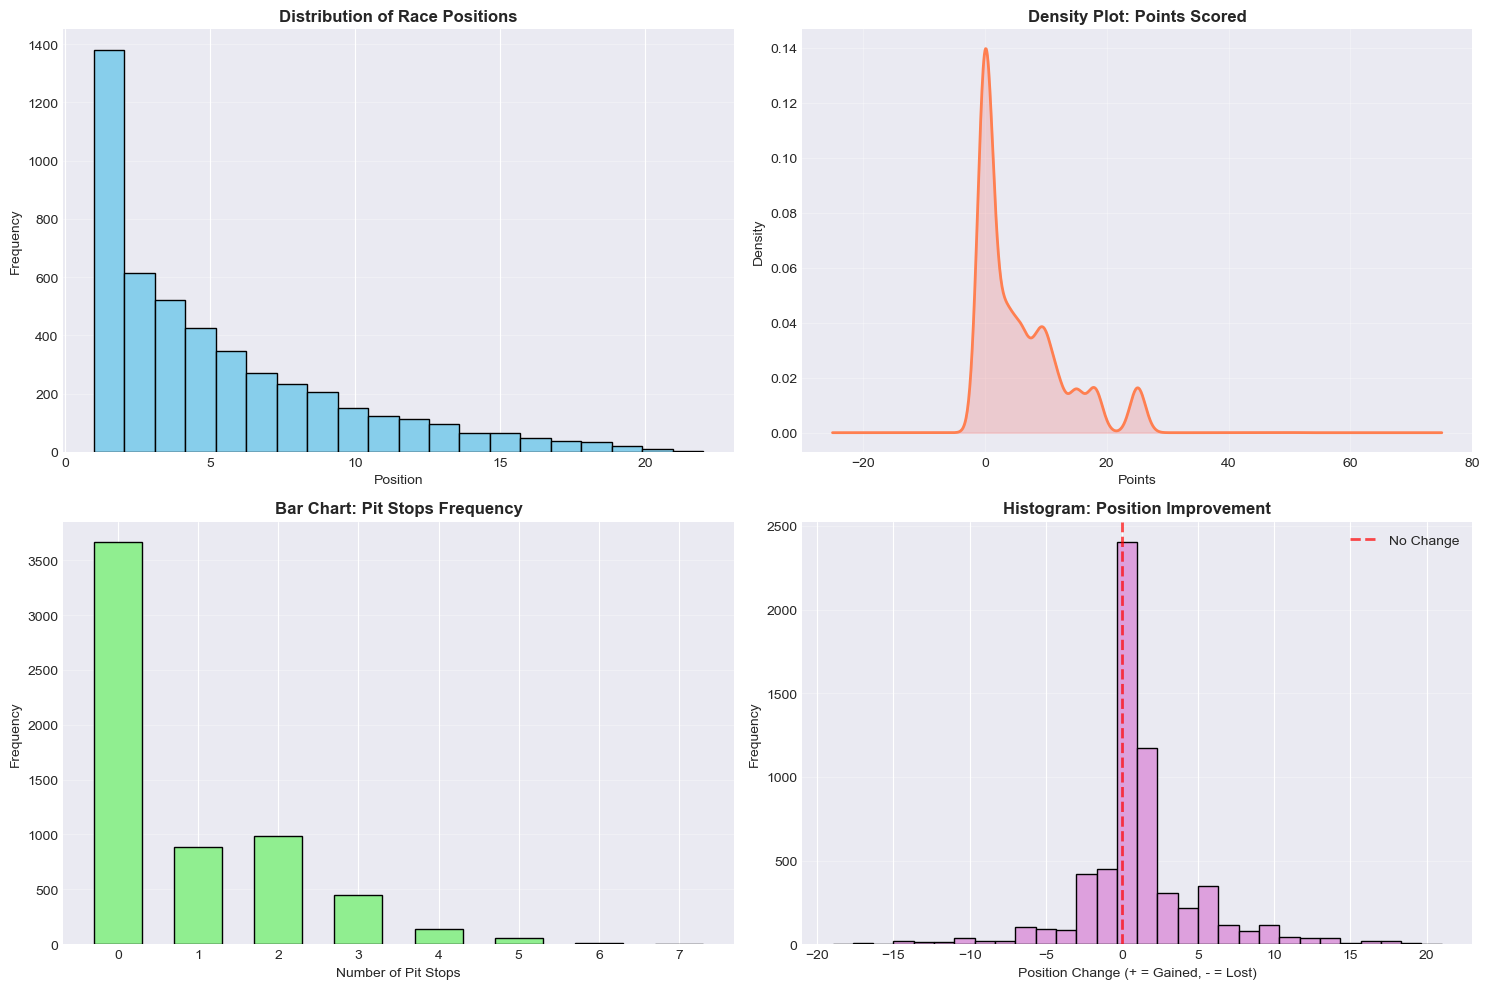

In [509]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

master_df['position'].dropna().hist(bins=20, ax=axes[0, 0], 
                                     color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Race Positions', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Position')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3, axis='y')

master_df['points'].dropna().plot(kind='density', ax=axes[0, 1], color='coral', linewidth=2)
axes[0, 1].fill_between(axes[0, 1].get_lines()[0].get_xdata(), 
                        axes[0, 1].get_lines()[0].get_ydata(), 
                        alpha=0.3, color='lightcoral')
axes[0, 1].set_title('Density Plot: Points Scored', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Points')
axes[0, 1].set_ylabel('Density')
axes[0, 1].grid(True, alpha=0.3)

pit_stop_counts = master_df['number_of_pit_stops'].value_counts().sort_index()
axes[1, 0].bar(pit_stop_counts.index, pit_stop_counts.values, 
               color='lightgreen', edgecolor='black', width=0.6)
axes[1, 0].set_title('Bar Chart: Pit Stops Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Pit Stops')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3, axis='y')

master_df['position_improvement'].dropna().hist(bins=30, ax=axes[1, 1], 
                                                 color='plum', edgecolor='black')
axes[1, 1].set_title('Histogram: Position Improvement', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Position Change (+ = Gained, - = Lost)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='No Change')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

 ## Bivariate Analysis

Team Performance Comparison

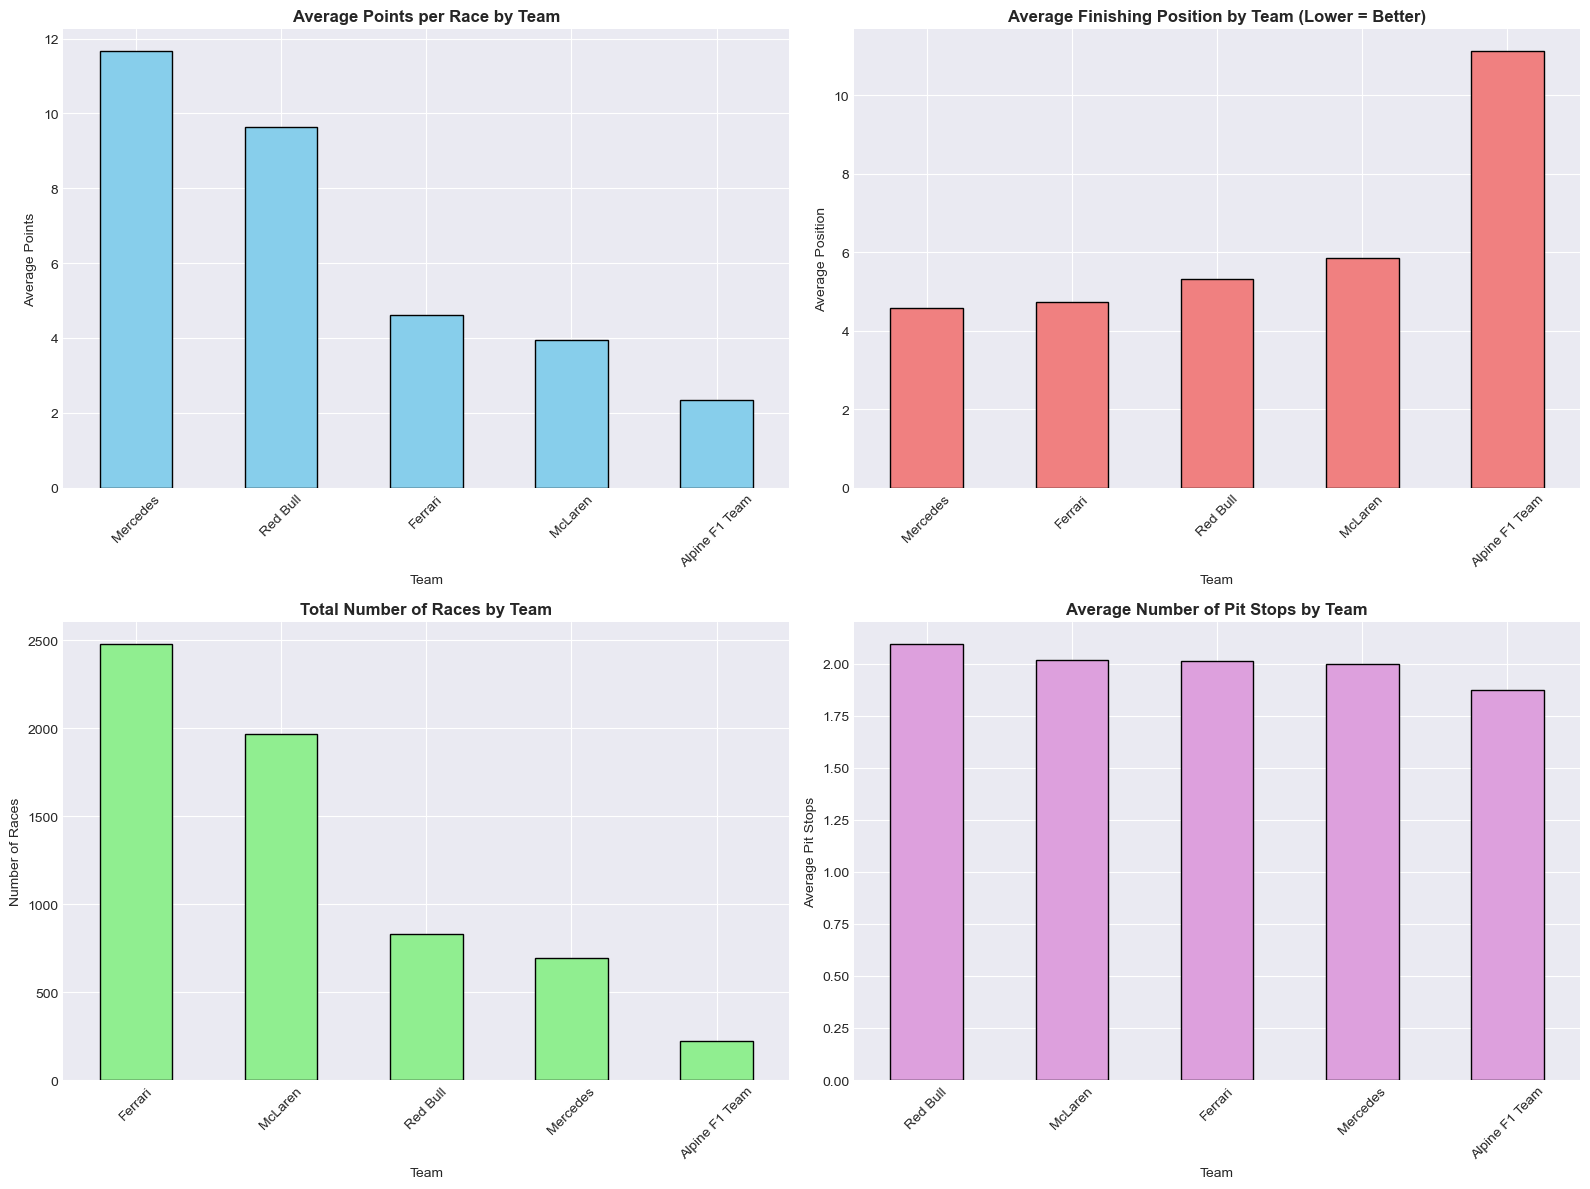

In [510]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

team_points = master_df.groupby('team_name')['points'].mean().sort_values(ascending=False)
team_points.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Average Points per Race by Team', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Team')
axes[0, 0].set_ylabel('Average Points')
axes[0, 0].tick_params(axis='x', rotation=45)

team_position = master_df.groupby('team_name')['position'].mean().sort_values()
team_position.plot(kind='bar', ax=axes[0, 1], color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Average Finishing Position by Team (Lower = Better)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Team')
axes[0, 1].set_ylabel('Average Position')
axes[0, 1].tick_params(axis='x', rotation=45)

team_races = master_df.groupby('team_name').size().sort_values(ascending=False)
team_races.plot(kind='bar', ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Total Number of Races by Team', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Team')
axes[1, 0].set_ylabel('Number of Races')
axes[1, 0].tick_params(axis='x', rotation=45)

team_pitstops = master_df[master_df['number_of_pit_stops'] > 0].groupby('team_name')['number_of_pit_stops'].mean().sort_values(ascending=False)
team_pitstops.plot(kind='bar', ax=axes[1, 1], color='plum', edgecolor='black')
axes[1, 1].set_title('Average Number of Pit Stops by Team', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Team')
axes[1, 1].set_ylabel('Average Pit Stops')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

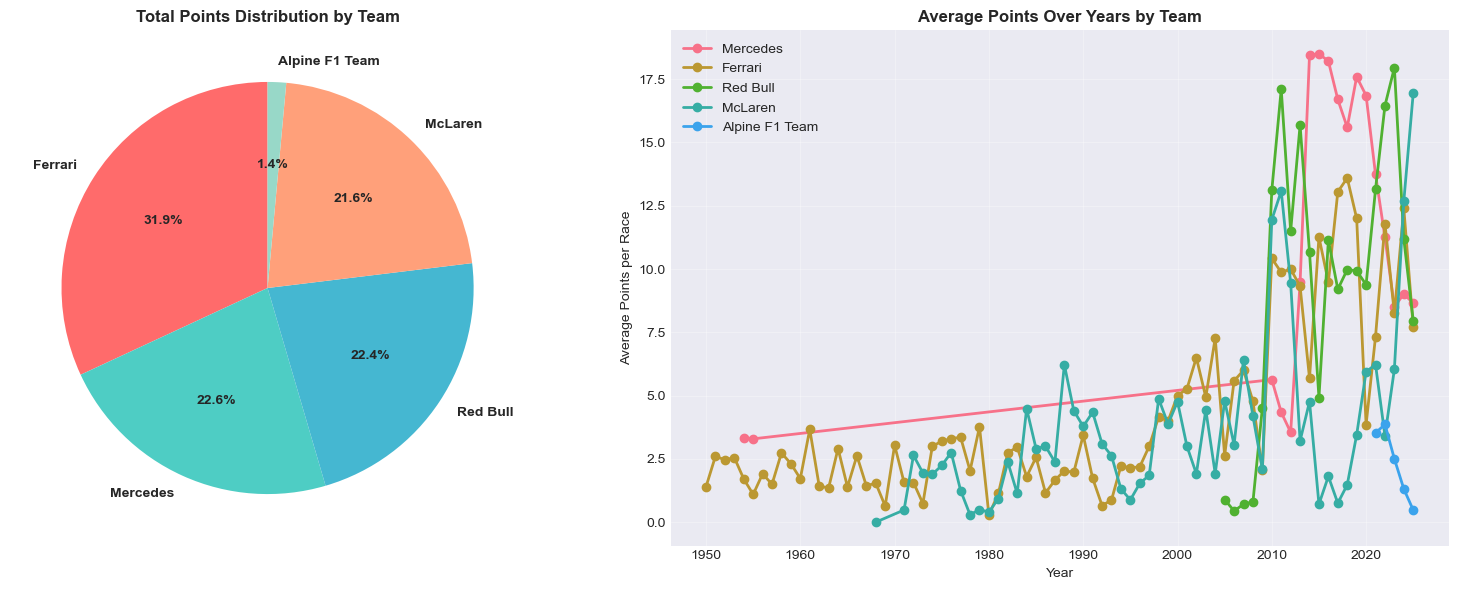

In [511]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

team_total_points = master_df.groupby('team_name')['points'].sum().sort_values(ascending=False)


axes[0].pie(team_total_points, labels=team_total_points.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[0].set_title('Total Points Distribution by Team', fontsize=12, fontweight='bold')

yearly_points = master_df.groupby(['race_year', 'team_name'])['points'].mean().reset_index()

for team in target_teams:
    team_data = yearly_points[yearly_points['team_name'] == team]
    axes[1].plot(team_data['race_year'], team_data['points'], 
                 marker='o', label=team, linewidth=2)

axes[1].set_title('Average Points Over Years by Team', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Points per Race')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Multivariate Analysis 

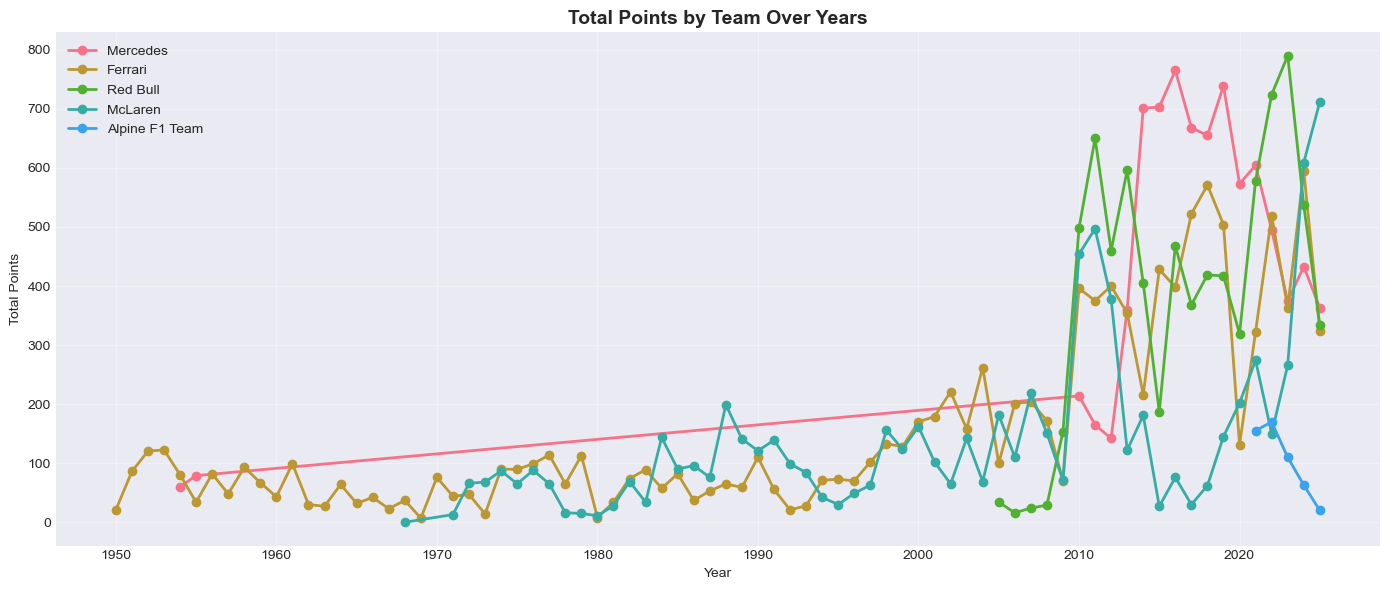

In [512]:
yearly_team_performance = master_df.groupby(['race_year', 'team_name']).agg({
    'points': 'sum',
    'position': 'mean'
}).reset_index()

plt.figure(figsize=(14, 6))

for team in target_teams:
    team_data = yearly_team_performance[yearly_team_performance['team_name'] == team]
    plt.plot(team_data['race_year'], team_data['points'], marker='o', label=team, linewidth=2)

plt.title('Total Points by Team Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

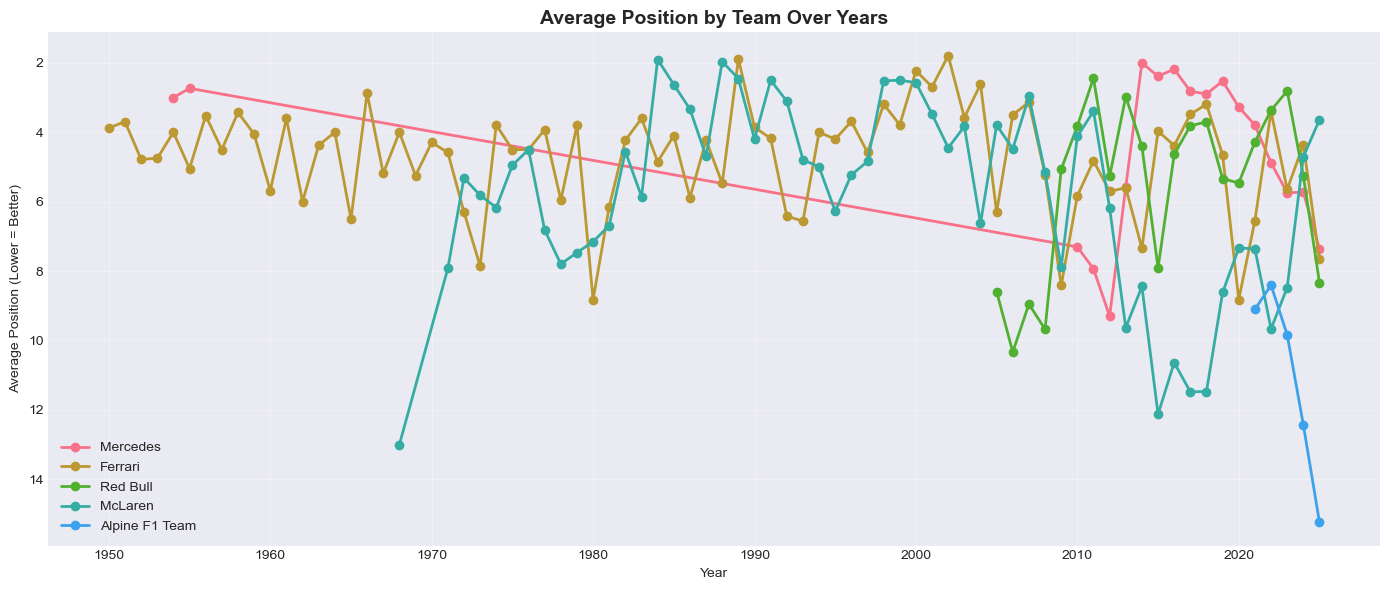

In [513]:
plt.figure(figsize=(14, 6))

for team in target_teams:
    team_data = yearly_team_performance[yearly_team_performance['team_name'] == team]
    plt.plot(team_data['race_year'], team_data['position'], marker='o', label=team, linewidth=2)

plt.title('Average Position by Team Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Position (Lower = Better)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

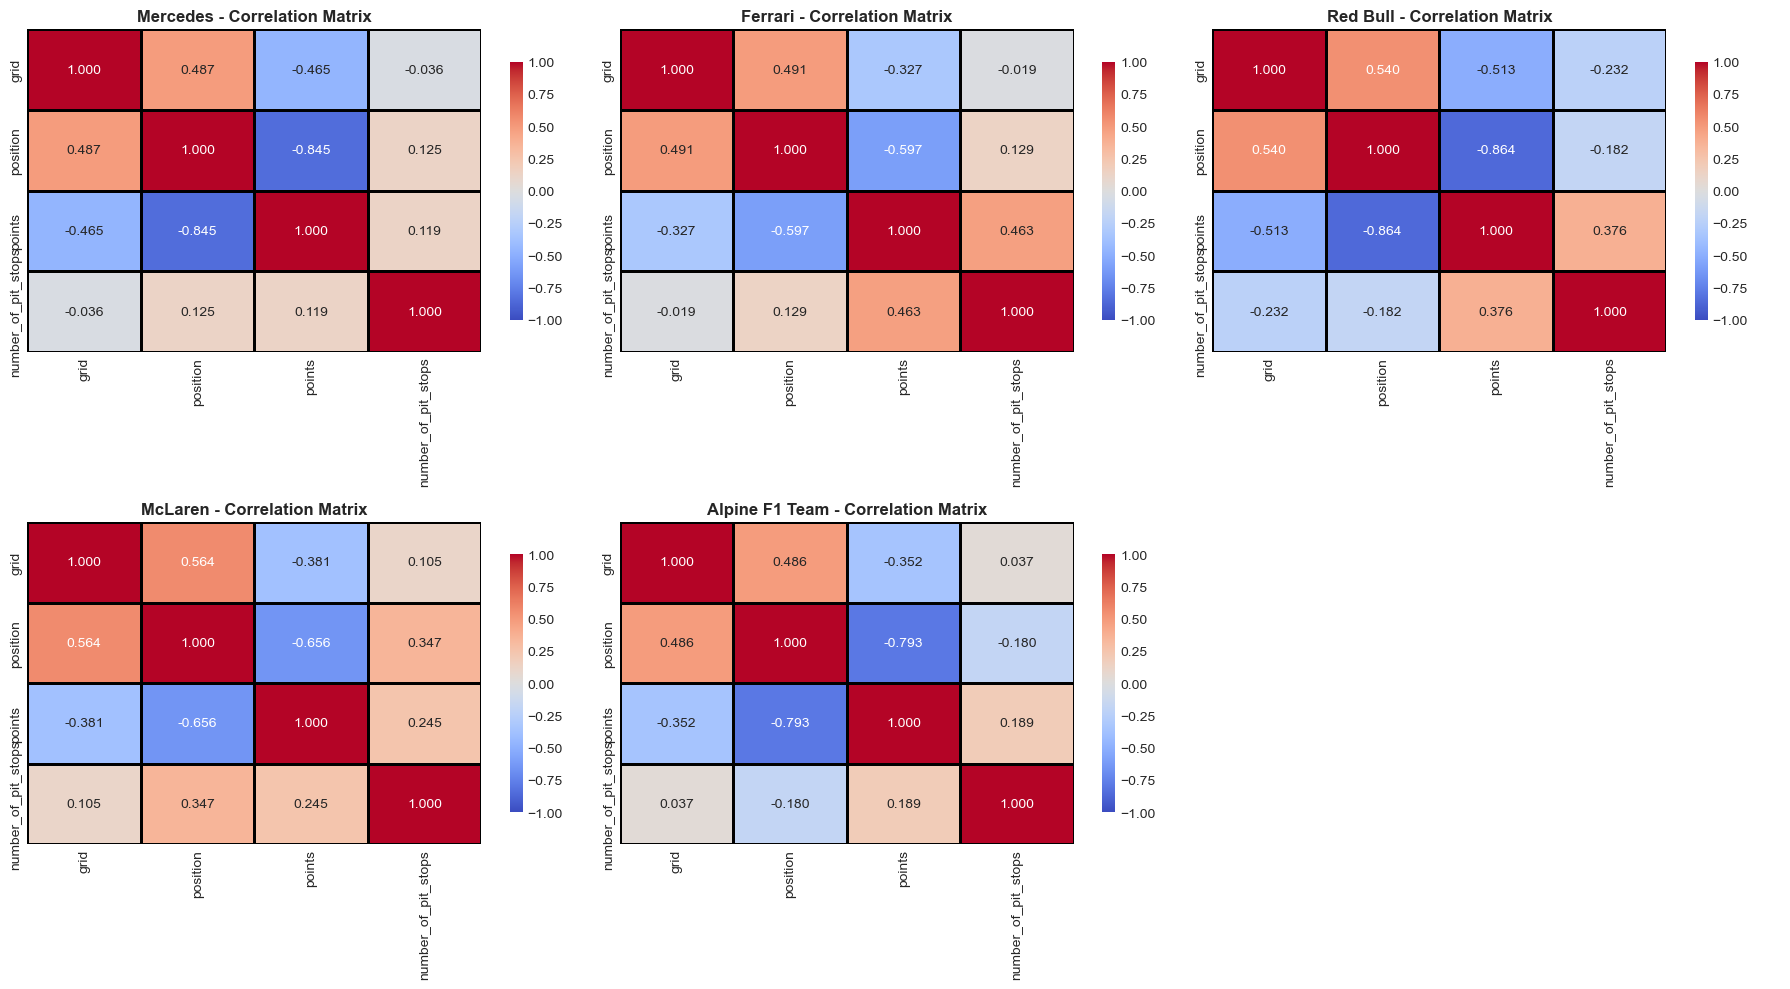

In [514]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, team in enumerate(target_teams):
    team_data = master_df[master_df['team_name'] == team][['grid', 'position', 'points', 'number_of_pit_stops']].copy()
    corr_matrix = team_data.corr()
    
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, ax=axes[idx], cbar_kws={'shrink': 0.8},
                vmin=-1, vmax=1, linewidths=1, linecolor='black')
    axes[idx].set_title(f'{team} - Correlation Matrix', fontsize=12, fontweight='bold')

axes[5].axis('off')

plt.tight_layout()
plt.show()

## Additional Pit Stop Strategy Analysis

<Figure size 1200x600 with 0 Axes>

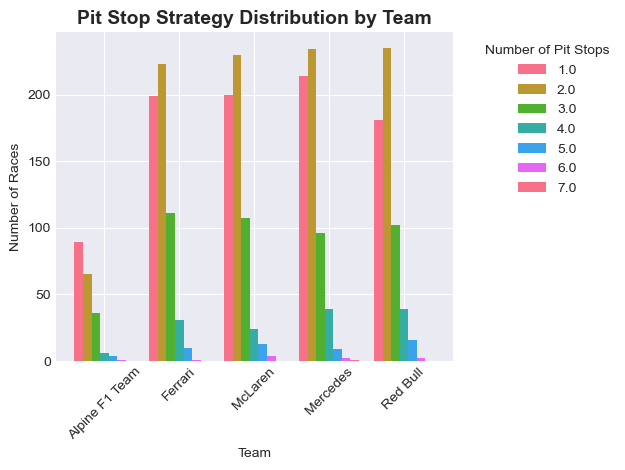

In [515]:
races_with_pitstops = master_df[master_df['number_of_pit_stops'] > 0].copy()

pit_strategy = races_with_pitstops.groupby(['team_name', 'number_of_pit_stops']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
pit_strategy.plot(kind='bar', stacked=False, width=0.8)
plt.title('Pit Stop Strategy Distribution by Team', fontsize=14, fontweight='bold')
plt.xlabel('Team')
plt.ylabel('Number of Races')
plt.legend(title='Number of Pit Stops', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

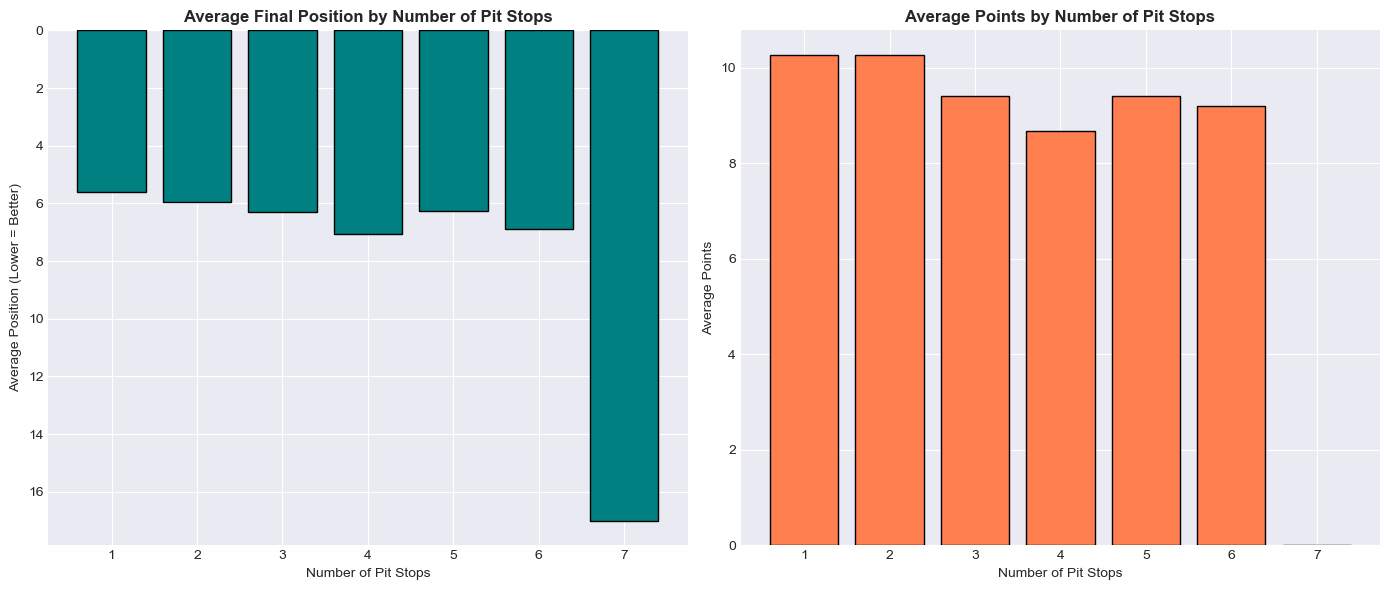


Pit Stop Impact Analysis:

Average position by number of pit stops:
number_of_pit_stops
1.0     5.596734
2.0     5.957356
3.0     6.297424
4.0     7.067164
5.0     6.260000
6.0     6.900000
7.0    17.000000
Name: position, dtype: float64

Average points by number of pit stops:
number_of_pit_stops
1.0    10.269536
2.0    10.262411
3.0     9.400442
4.0     8.669065
5.0     9.403846
6.0     9.200000
7.0     0.000000
Name: points, dtype: float64


In [516]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pit_impact = races_with_pitstops.groupby('number_of_pit_stops')['position'].mean()
plt.bar(pit_impact.index, pit_impact.values, color='teal', edgecolor='black')
plt.title('Average Final Position by Number of Pit Stops', fontsize=12, fontweight='bold')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Average Position (Lower = Better)')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
pit_points = races_with_pitstops.groupby('number_of_pit_stops')['points'].mean()
plt.bar(pit_points.index, pit_points.values, color='coral', edgecolor='black')
plt.title('Average Points by Number of Pit Stops', fontsize=12, fontweight='bold')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Average Points')

plt.tight_layout()
plt.show()

print("\nPit Stop Impact Analysis:")
print("\nAverage position by number of pit stops:")
print(pit_impact)
print("\nAverage points by number of pit stops:")
print(pit_points)

## Time Series Analysis

## Time Series - Driver Performance 

Top 10 Drivers by Total Points:
driver_full_name
Lewis Hamilton        4947.5
Max Verstappen        3164.5
Sebastian Vettel      2977.0
Fernando Alonso       1593.0
Charles Leclerc       1521.0
Nico Rosberg          1519.0
Kimi Räikkönen        1417.0
Valtteri Bottas       1320.0
Lando Norris          1317.0
Michael Schumacher    1263.0
Name: points, dtype: float64


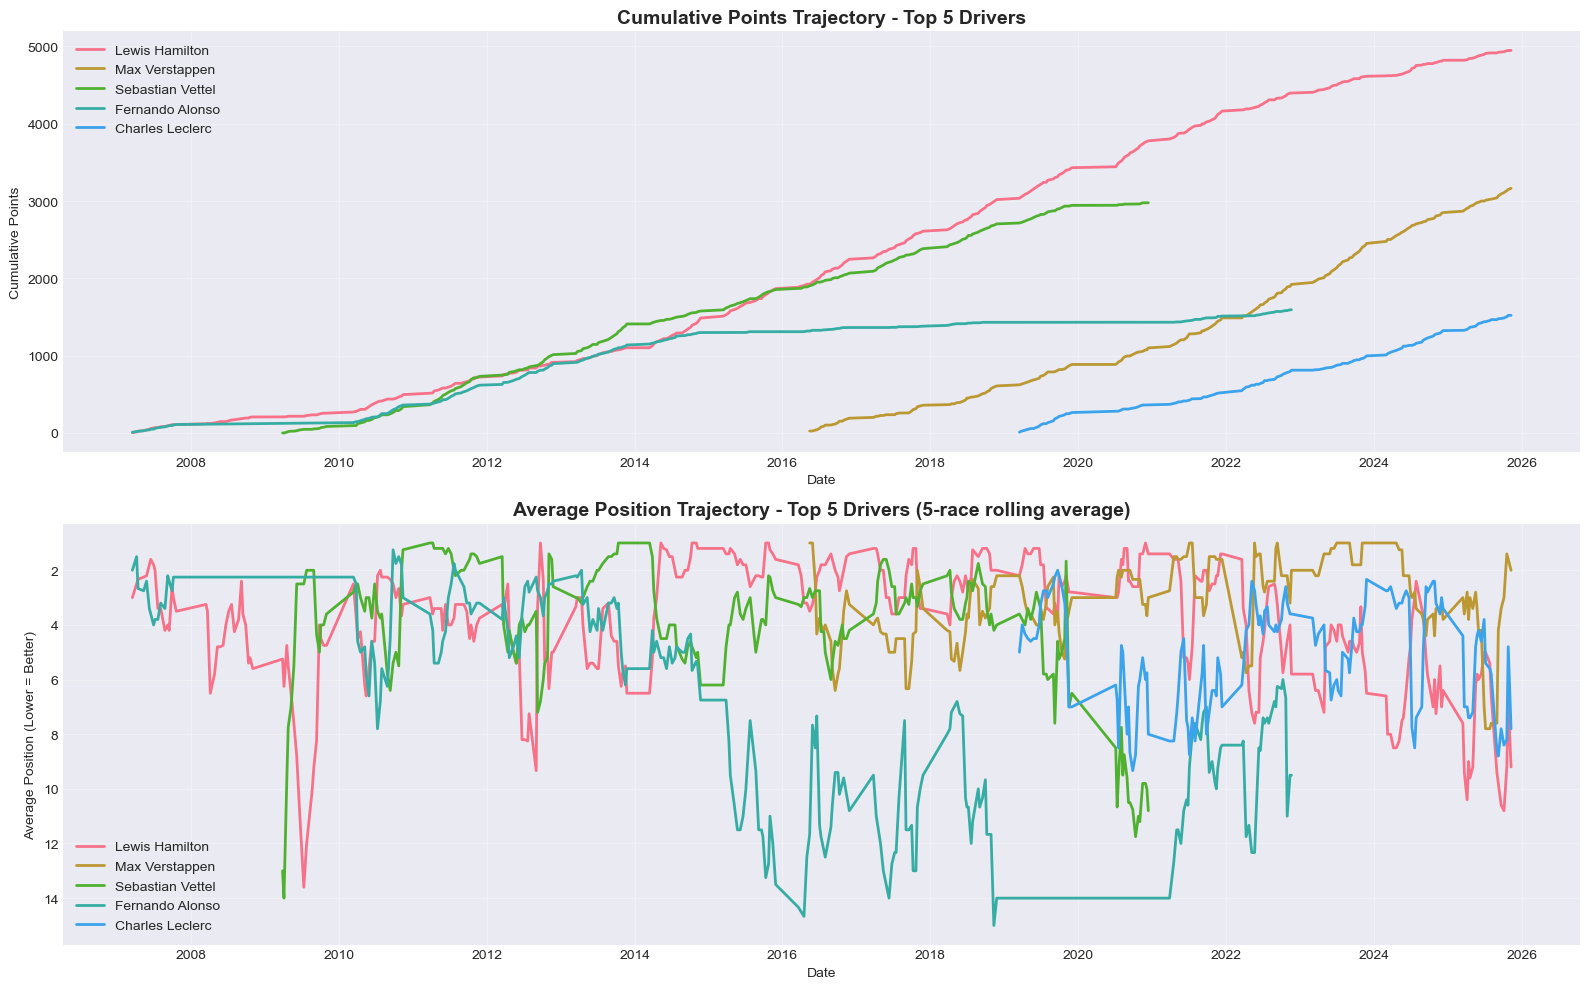

In [517]:

master_df['date'] = pd.to_datetime(master_df['date'])


top_drivers = master_df.groupby('driver_full_name')['points'].sum().nlargest(10).index

print("Top 10 Drivers by Total Points:")
print(master_df.groupby('driver_full_name')['points'].sum().nlargest(10))


fig, axes = plt.subplots(2, 1, figsize=(16, 10))


for driver in top_drivers[:5]:  
    driver_data = master_df[master_df['driver_full_name'] == driver].sort_values('date')
    axes[0].plot(driver_data['date'], driver_data['points'].cumsum(), label=driver, linewidth=2)

axes[0].set_title('Cumulative Points Trajectory - Top 5 Drivers', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cumulative Points')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)


for driver in top_drivers[:5]:
    driver_data = master_df[master_df['driver_full_name'] == driver].sort_values('date').copy()
    driver_data['position_rolling'] = driver_data['position'].rolling(window=5, min_periods=1).mean()
    axes[1].plot(driver_data['date'], driver_data['position_rolling'], label=driver, linewidth=2)

axes[1].set_title('Average Position Trajectory - Top 5 Drivers (5-race rolling average)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Position (Lower = Better)')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## Team Improvements since 2000

In [518]:
df_since_2000 = master_df[master_df['race_year'] >= 2000].copy()

performance_2000 = df_since_2000.groupby(['race_year', 'team_name']).agg({
    'points': 'sum',
    'position': 'mean',
    'position_improvement': 'mean',
    'number_of_pit_stops': 'mean'
}).reset_index()

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Total Points Evolution Since 2000',
                    'Average Position Trend Since 2000',
                    'Average Position Improvement Since 2000',
                    'Average Pit Stops Trend Since 2000'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

for team in target_teams:
    team_data = performance_2000[performance_2000['team_name'] == team]
    fig.add_trace(
        go.Scatter(x=team_data['race_year'], y=team_data['points'],
                   mode='lines+markers', name=team,
                   legendgroup=team, showlegend=True),
        row=1, col=1
    )

for team in target_teams:
    team_data = performance_2000[performance_2000['team_name'] == team]
    fig.add_trace(
        go.Scatter(x=team_data['race_year'], y=team_data['position'],
                   mode='lines+markers', name=team,
                   legendgroup=team, showlegend=False),
        row=1, col=2
    )

for team in target_teams:
    team_data = performance_2000[performance_2000['team_name'] == team]
    fig.add_trace(
        go.Scatter(x=team_data['race_year'], y=team_data['position_improvement'],
                   mode='lines+markers', name=team,
                   legendgroup=team, showlegend=False),
        row=2, col=1
    )

for team in target_teams:
    team_data = performance_2000[performance_2000['team_name'] == team]
    fig.add_trace(
        go.Scatter(x=team_data['race_year'], y=team_data['number_of_pit_stops'],
                   mode='lines+markers', name=team,
                   legendgroup=team, showlegend=False),
        row=2, col=2
    )

fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_yaxes(title_text="Total Points", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_yaxes(title_text="Average Position", row=1, col=2)
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_yaxes(title_text="Position Improvement", row=2, col=1)
fig.update_xaxes(title_text="Year", row=2, col=2)
fig.update_yaxes(title_text="Average Pit Stops", row=2, col=2)

fig.update_layout(height=1000, title_text="Performance Analysis Since 2000",
                  hovermode='x unified', showlegend=True)
fig.show()

## Race Trends over Time

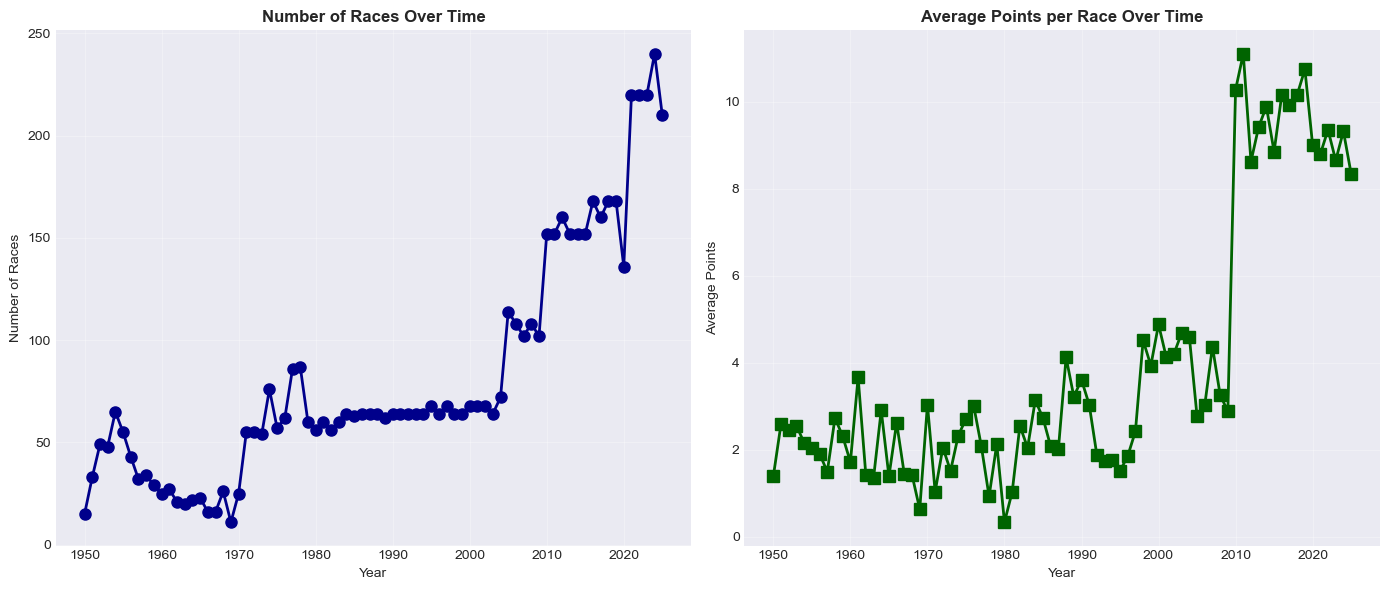

In [519]:
races_per_year = master_df.groupby('race_year').size()
avg_points_year = master_df.groupby('race_year')['points'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(races_per_year.index, races_per_year.values, marker='o', linewidth=2, markersize=8, color='darkblue')
plt.title('Number of Races Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(avg_points_year.index, avg_points_year.values, marker='s', linewidth=2, markersize=8, color='darkgreen')
plt.title('Average Points per Race Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Plotly Plots - Team Performance Over Time

In [520]:

yearly_performance = master_df.groupby(['race_year', 'team_name'])['points'].sum().reset_index()

fig = px.line(yearly_performance, x='race_year', y='points', color='team_name',
              title='Team Performance Over Time (Interactive)',
              labels={'race_year': 'Year', 'points': 'Total Points', 'team_name': 'Team'},
              markers=True)
fig.update_layout(hovermode='x unified', height=500)
fig.show()

## Plotly - Grid vs Final Position

In [521]:

fig = px.scatter(master_df, x='grid', y='position', color='team_name',
                 hover_data=['driver_full_name', 'race_year', 'points'],
                 title='Grid Position vs Final Position by Team',
                 labels={'grid': 'Starting Grid Position', 
                        'position': 'Final Position',
                        'team_name': 'Team'},
                 opacity=0.6)
fig.update_layout(height=500)
fig.show()

##  Plotly - Points Distribution Box Plot

In [522]:

fig = px.box(master_df, x='team_name', y='points', color='team_name',
             title='Points Distribution by Team',
             labels={'team_name': 'Team', 'points': 'Points Scored'})
fig.update_layout(showlegend=False, height=500)
fig.show()

##  Recommendations per Team

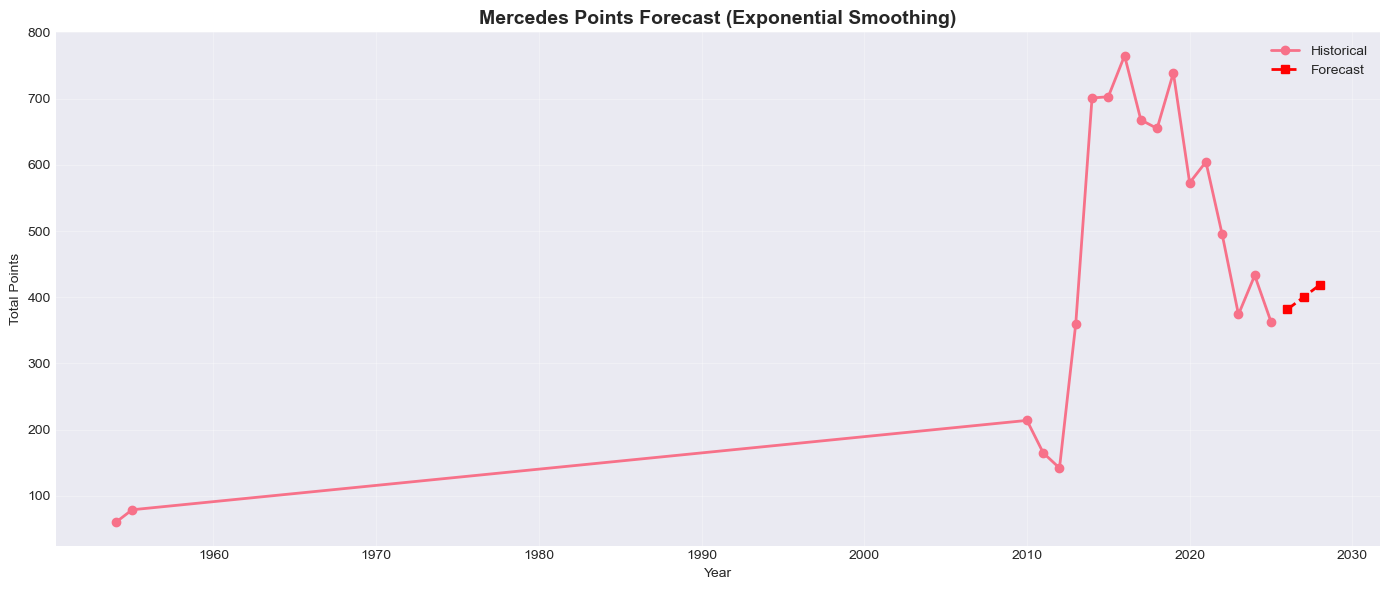


Mercedes Points Forecast:
Year 2026: 381.58 points (forecasted)
Year 2027: 400.16 points (forecasted)
Year 2028: 418.74 points (forecasted)


In [523]:


mercedes_data = master_df[master_df['team_name'] == 'Mercedes'].copy()
mercedes_yearly = mercedes_data.groupby('race_year')['points'].sum().sort_index()

if len(mercedes_yearly) >= 3:

    model = ExponentialSmoothing(mercedes_yearly, seasonal=None, trend='add')
    fitted_model = model.fit()
    

    forecast = fitted_model.forecast(steps=3)
    forecast_years = range(mercedes_yearly.index[-1] + 1, mercedes_yearly.index[-1] + 4)
    
 
    plt.figure(figsize=(14, 6))
    plt.plot(mercedes_yearly.index, mercedes_yearly.values, marker='o', label='Historical', linewidth=2)
    plt.plot(forecast_years, forecast, marker='s', linestyle='--', label='Forecast', linewidth=2, color='red')
    plt.title('Mercedes Points Forecast (Exponential Smoothing)', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Total Points')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nMercedes Points Forecast:")
    for year, points in zip(forecast_years, forecast):
        print(f"Year {year}: {points:.2f} points (forecasted)")
else:
    print("No data)")

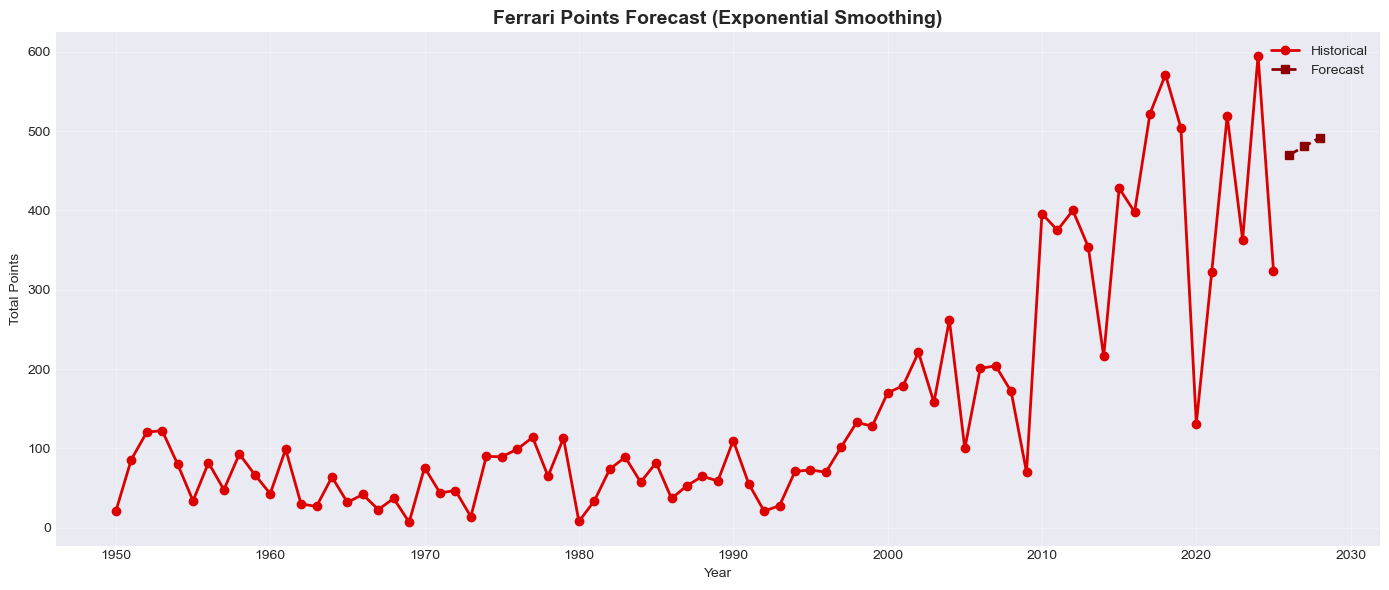


Ferrari Points Forecast:
Year 2026: 469.73 points (forecasted)
Year 2027: 480.65 points (forecasted)
Year 2028: 491.57 points (forecasted)


In [524]:



ferrari_data = master_df[master_df['team_name'] == 'Ferrari'].copy()
ferrari_yearly = ferrari_data.groupby('race_year')['points'].sum().sort_index()

if len(ferrari_yearly) >= 3:
    
    model = ExponentialSmoothing(ferrari_yearly, seasonal=None, trend='add')
    fitted_model = model.fit()
    
    forecast = fitted_model.forecast(steps=3)
    forecast_years = range(ferrari_yearly.index[-1] + 1, ferrari_yearly.index[-1] + 4)
    
   
    plt.figure(figsize=(14, 6))
    plt.plot(ferrari_yearly.index, ferrari_yearly.values, marker='o', label='Historical', linewidth=2, color='#DC0000')
    plt.plot(forecast_years, forecast, marker='s', linestyle='--', label='Forecast', linewidth=2, color='darkred')
    plt.title('Ferrari Points Forecast (Exponential Smoothing)', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Total Points')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nFerrari Points Forecast:")
    for year, points in zip(forecast_years, forecast):
        print(f"Year {year}: {points:.2f} points (forecasted)")
else:
    print("No data)")

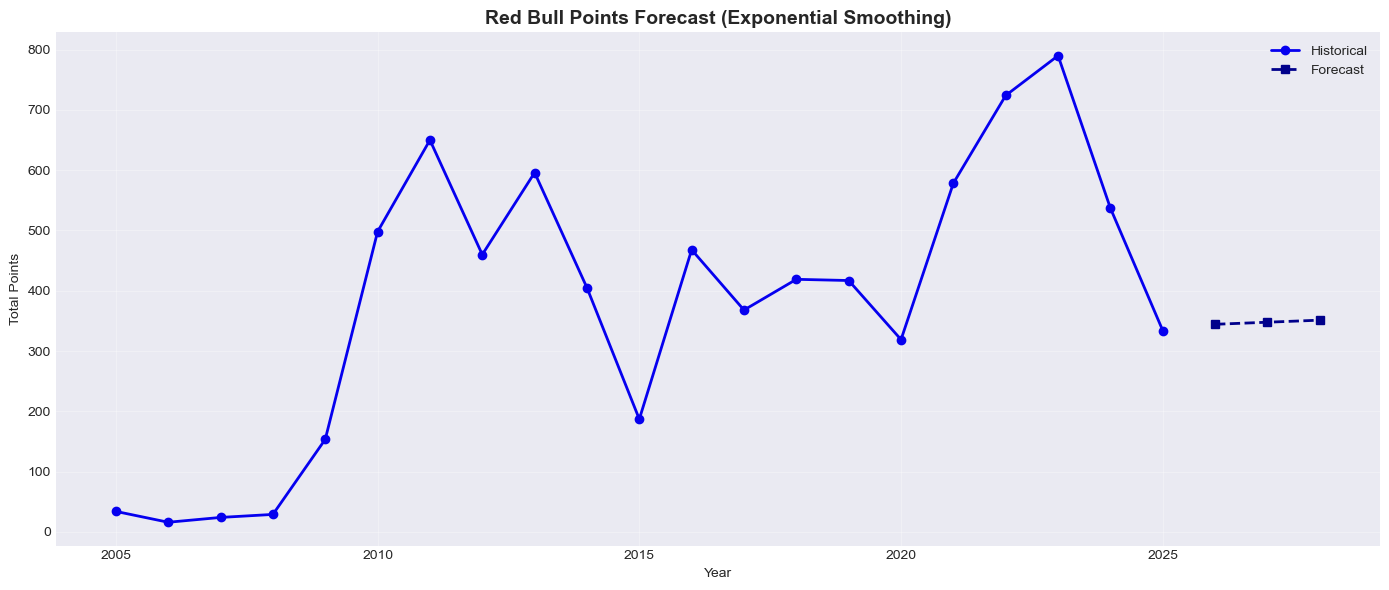


Red Bull Points Forecast:
Year 2026: 344.39 points (forecasted)
Year 2027: 347.82 points (forecasted)
Year 2028: 351.26 points (forecasted)


In [525]:

redbull_data = master_df[master_df['team_name'] == 'Red Bull'].copy()
redbull_yearly = redbull_data.groupby('race_year')['points'].sum().sort_index()

if len(redbull_yearly) >= 3:
    
    model = ExponentialSmoothing(redbull_yearly, seasonal=None, trend='add')
    fitted_model = model.fit()
    
    
    forecast = fitted_model.forecast(steps=3)
    forecast_years = range(redbull_yearly.index[-1] + 1, redbull_yearly.index[-1] + 4)
    
    
    plt.figure(figsize=(14, 6))
    plt.plot(redbull_yearly.index, redbull_yearly.values, marker='o', label='Historical', linewidth=2, color='#0600EF')
    plt.plot(forecast_years, forecast, marker='s', linestyle='--', label='Forecast', linewidth=2, color='darkblue')
    plt.title('Red Bull Points Forecast (Exponential Smoothing)', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Total Points')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nRed Bull Points Forecast:")
    for year, points in zip(forecast_years, forecast):
        print(f"Year {year}: {points:.2f} points (forecasted)")
else:
    print("No data)")

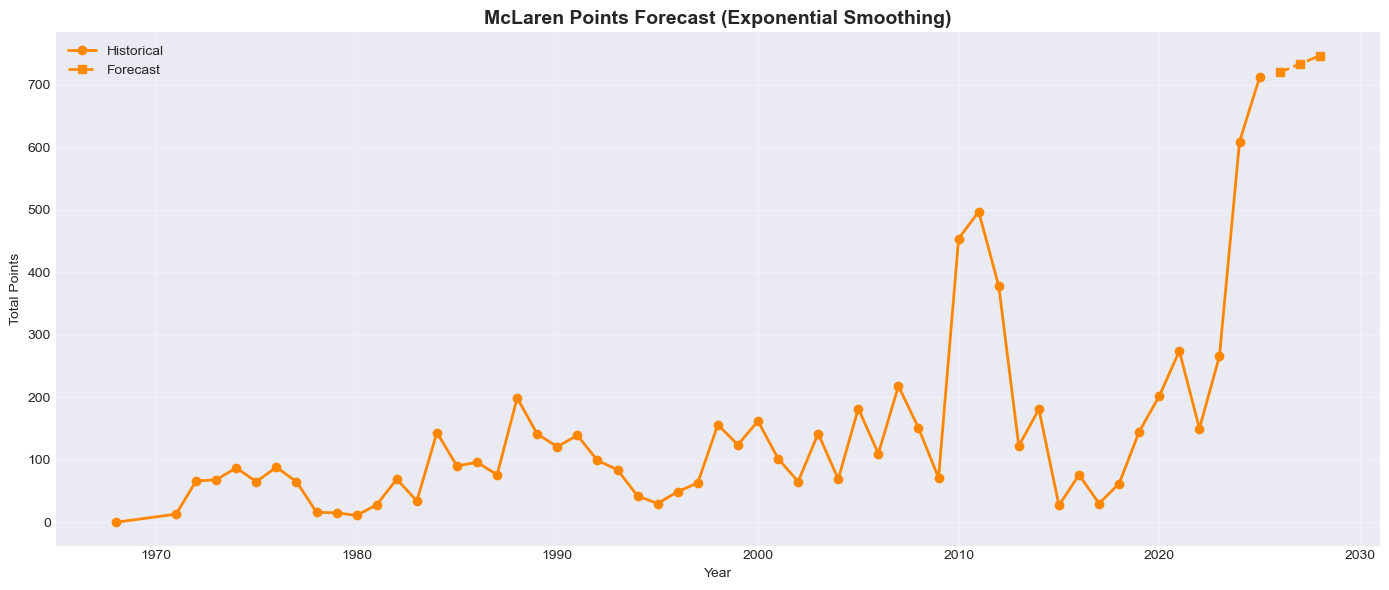


McLaren Points Forecast:
Year 2026: 719.84 points (forecasted)
Year 2027: 733.25 points (forecasted)
Year 2028: 746.65 points (forecasted)


In [526]:


mclaren_data = master_df[master_df['team_name'] == 'McLaren'].copy()
mclaren_yearly = mclaren_data.groupby('race_year')['points'].sum().sort_index()

if len(mclaren_yearly) >= 3:
   
    model = ExponentialSmoothing(mclaren_yearly, seasonal=None, trend='add')
    fitted_model = model.fit()
    
    forecast = fitted_model.forecast(steps=3)
    forecast_years = range(mclaren_yearly.index[-1] + 1, mclaren_yearly.index[-1] + 4)
    

    plt.figure(figsize=(14, 6))
    plt.plot(mclaren_yearly.index, mclaren_yearly.values, marker='o', label='Historical', linewidth=2, color='#FF8700')
    plt.plot(forecast_years, forecast, marker='s', linestyle='--', label='Forecast', linewidth=2, color='darkorange')
    plt.title('McLaren Points Forecast (Exponential Smoothing)', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Total Points')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nMcLaren Points Forecast:")
    for year, points in zip(forecast_years, forecast):
        print(f"Year {year}: {points:.2f} points (forecasted)")
else:
    print("No data)")

In [527]:

recommendations_data = []

for team in target_teams:
    team_data = master_df[master_df['team_name'] == team]
    
    metrics = {
        'Team': team,
        'Total Points': team_data['points'].sum(),
        'Avg Position': team_data['position'].mean(),
        'Avg Pit Stops': team_data[team_data['number_of_pit_stops'] > 0]['number_of_pit_stops'].mean(),
        'Avg Position Improvement': team_data['position_improvement'].mean(),
        'Win Rate %': (team_data['position'] == 1).sum() / len(team_data) * 100
    }
    recommendations_data.append(metrics)

recommendations_df = pd.DataFrame(recommendations_data).round(2)


display(recommendations_df)

,Team,Total Points,Avg Position,Avg Pit Stops,Avg Position Improvement,Win Rate %
0,Mercedes,8093.64,4.58,2.00,0.40,18.88
1,Ferrari,11415.27,4.73,2.01,0.92,10.04
2,Red Bull,8007.00,5.33,2.10,0.80,15.30
3,McLaren,7734.50,5.86,2.02,1.24,10.13
4,Alpine F1 Team,518.00,11.13,1.88,0.53,0.45


## DRIVER PREDICTION FORECAST

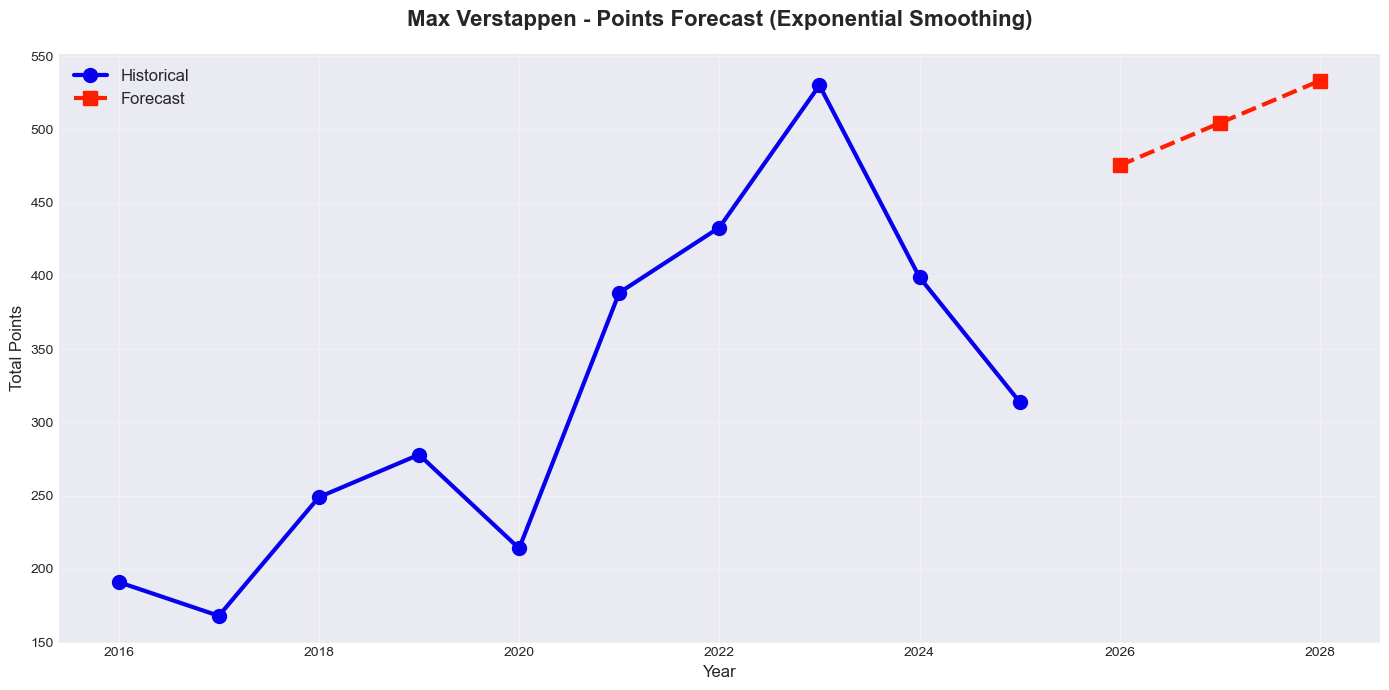

In [528]:



verstappen_data = master_df[master_df['driver_full_name'] == 'Max Verstappen'].copy()
verstappen_yearly = verstappen_data.groupby('race_year')['points'].sum().sort_index()

if len(verstappen_yearly) >= 3:

    model = ExponentialSmoothing(verstappen_yearly, seasonal=None, trend='add')
    fitted_model = model.fit()
    

    forecast = fitted_model.forecast(steps=3)
    forecast_years = range(verstappen_yearly.index[-1] + 1, verstappen_yearly.index[-1] + 4)
    

    plt.figure(figsize=(14, 7))
    plt.plot(verstappen_yearly.index, verstappen_yearly.values, 
             marker='o', label='Historical', linewidth=3, markersize=10, color='#0600EF')
    plt.plot(forecast_years, forecast, 
             marker='s', linestyle='--', label='Forecast', linewidth=3, markersize=10, color='#FF1E00')
    plt.title('Max Verstappen - Points Forecast (Exponential Smoothing)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Points', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

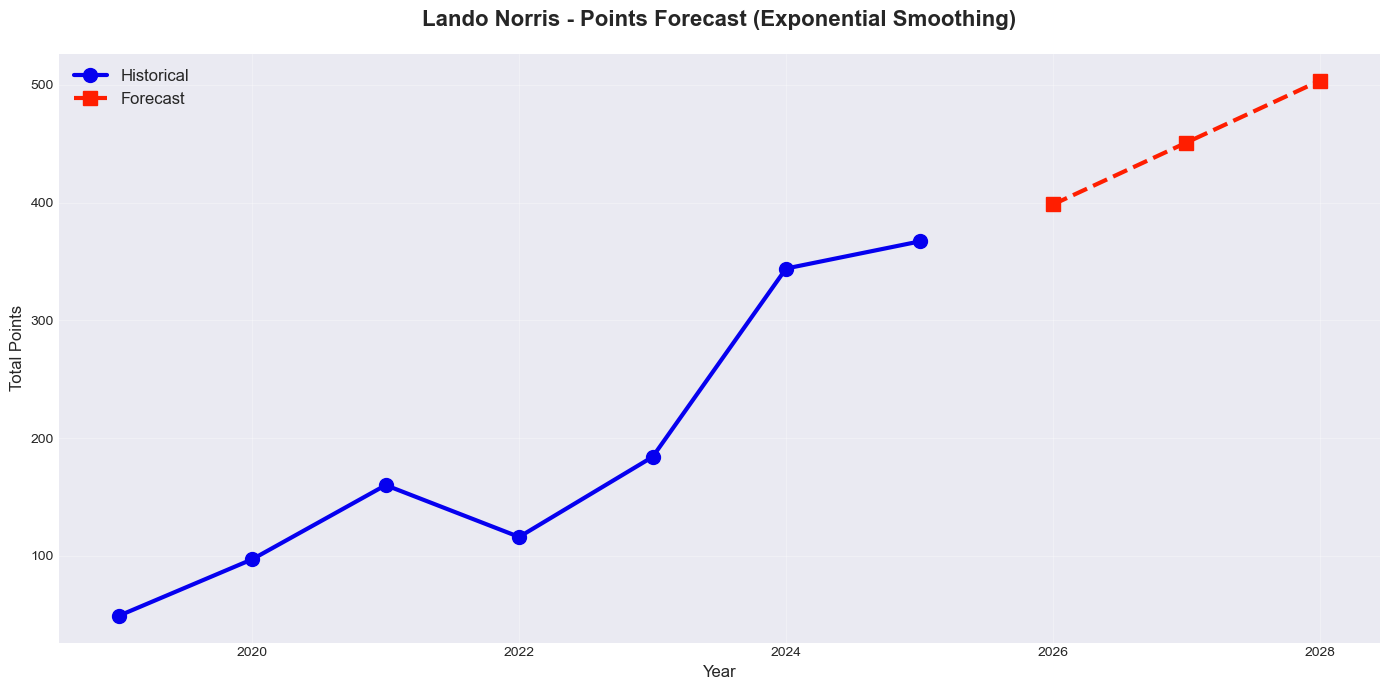

In [529]:


verstappen_data = master_df[master_df['driver_full_name'] == 'Lando Norris'].copy()
verstappen_yearly = verstappen_data.groupby('race_year')['points'].sum().sort_index()

if len(verstappen_yearly) >= 3:

    model = ExponentialSmoothing(verstappen_yearly, seasonal=None, trend='add')
    fitted_model = model.fit()
    

    forecast = fitted_model.forecast(steps=3)
    forecast_years = range(verstappen_yearly.index[-1] + 1, verstappen_yearly.index[-1] + 4)
    

    plt.figure(figsize=(14, 7))
    plt.plot(verstappen_yearly.index, verstappen_yearly.values, 
             marker='o', label='Historical', linewidth=3, markersize=10, color='#0600EF')
    plt.plot(forecast_years, forecast, 
             marker='s', linestyle='--', label='Forecast', linewidth=3, markersize=10, color='#FF1E00')
    plt.title('Lando Norris - Points Forecast (Exponential Smoothing)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Points', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## General Strategic Recommendations by Team

## Mercedes - Performance Analysis & Recommendations

Mercedes could push a bit harder during races instead of playing it too safe.

They often maintain their starting position instead of overtaking aggressively.

Qualifying pace can still improve — even a small gain puts them higher on the grid.

Strategy calls could be a little bolder when unexpected race situations happen.

They sometimes lack that extra edge needed to turn strong performances into dominating wins.

## Ferrari - Performance Analysis & Recommendations

Ferrari needs to turn more of their podium finishes into actual race wins.

Their qualifying pace is holding them back from starting near the very front.

They rely too much on making up positions on Sunday instead of starting higher up.

A few operational mistakes here and there still cost them important points.

To fight consistently at the top, they need a more stable single-lap performance.

## Red Bull Racing - Performance Analysis & Recommendations

Red Bull’s biggest issue is consistency — they mix great results with some average ones.

Their qualifying pace sometimes leaves too much work for the race.

They should try to limit the “off days” where they finish in the midfield.

Strategy can be too aggressive at times, costing them easy points.

Improving race-to-race stability will help them in longer championship fights.

## McLaren - Performance Analysis & Recommendations

McLaren needs to qualify better so they don’t have to fight from the midfield every time.

They gain a lot of positions in the race, but that means they aren’t starting high enough.

They should work on converting more podiums into race wins.

Sometimes their Saturday pace doesn’t match their strong Sunday pace.

Small improvements in setup or low-fuel performance could give them a big step forward.

## Alpine F1 Team - Performance Analysis & Recommendations

Alpine needs more overall pace — they’re too far from the points on average.

Qualifying is a major weakness and makes scoring points much harder.

They rarely compete for podiums, so race-day potential needs a big boost.

Even when the car is decent, consistency in finishing positions is missing.

Their focus should be on small, realistic gains — like getting into the top 10 regularly.